## Importing Modules

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the Dataset

In [2]:
main_dir = "/home/archihalder/Projects/Fruit Classifier/Classes"
os.listdir(main_dir)

['test', 'train']

In [3]:
test_dir = main_dir + '/test'
os.listdir(test_dir)

['Orange', 'Banana', 'Mango', 'Apple', 'Pineapple']

In [4]:
train_dir = main_dir + '/train'
os.listdir(train_dir)

['Orange', 'Banana', 'Mango', 'Apple', 'Pineapple']

## Train Set

In [5]:
# Creating a data generator
train = ImageDataGenerator(
  rescale=1./255, 
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)
train_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'training')

val_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'validation')

# Printing the training set
train_labels = (train_datagen.class_indices)
print(train_labels)

Found 1800 images belonging to 5 classes.
Found 445 images belonging to 5 classes.
{'Apple': 0, 'Banana': 1, 'Mango': 2, 'Orange': 3, 'Pineapple': 4}


## Test Set

In [6]:
# Create a data generator
test_datagen = ImageDataGenerator(
  rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True
)
test_datagen = test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse')

# Printing the test set
test_labels = (test_datagen.class_indices)
print(test_labels)

Found 755 images belonging to 5 classes.
{'Apple': 0, 'Banana': 1, 'Mango': 2, 'Orange': 3, 'Pineapple': 4}


## Image Configuration

In [7]:
for image_batch, label_batch in train_datagen:
    break
image_batch.shape, label_batch.shape

# This would be same for test set

((32, 128, 128, 3), (32,))

## Building the Model

In [8]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), 
                 padding='same',
                 input_shape=(128,128,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), 
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), 
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

## Compiling the Model

In [9]:
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

## Training the Model

In [10]:
trained_model = model.fit(train_datagen, epochs=40, 
                          batch_size = 32, 
                          validation_data = val_datagen, verbose = 1)

Epoch 1/40
57/57 [==============================] - 24s 407ms/step - loss: 1.5726 - accuracy: 0.2240 - val_loss: 1.0185 - val_accuracy: 0.4876
Epoch 2/40
57/57 [==============================] - 24s 426ms/step - loss: 0.8884 - accuracy: 0.6388 - val_loss: 0.5869 - val_accuracy: 0.7618
Epoch 3/40
57/57 [==============================] - 24s 422ms/step - loss: 0.6793 - accuracy: 0.7464 - val_loss: 0.5998 - val_accuracy: 0.7596
Epoch 4/40
57/57 [==============================] - 24s 421ms/step - loss: 0.5943 - accuracy: 0.7886 - val_loss: 0.2831 - val_accuracy: 0.9416
Epoch 5/40
57/57 [==============================] - 25s 436ms/step - loss: 0.5485 - accuracy: 0.8167 - val_loss: 0.5926 - val_accuracy: 0.6607
Epoch 6/40
57/57 [==============================] - 27s 478ms/step - loss: 0.5492 - accuracy: 0.7971 - val_loss: 0.6421 - val_accuracy: 0.7528
Epoch 7/40
57/57 [==============================] - 26s 458ms/step - loss: 0.4558 - accuracy: 0.8318 - val_loss: 0.2569 - val_accuracy: 0.9169

## Saving the Model

In [12]:
model.save('model.h5')

In [13]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

## Testing the model

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_img = test_dir + '/Orange/1.jpg'
img = image.load_img(test_img, target_size = (128,128))
img_array = image.img_to_array(img)
img_array = np.array(img_array)/255.0
img_array
labels = dict((value,key) for key, value in train_labels.items())
predictions = model.predict(img_array[np.newaxis, ...])
print(predictions[0])
print(np.max(predictions[0]))
index = np.argmax(predictions[0])
print(labels[np.argmax(predictions[0], axis = -1)])

[3.9104184e-06 2.8696113e-07 6.4500598e-03 9.9354362e-01 2.0804573e-06]
0.9935436
Orange


## Evaluating the result

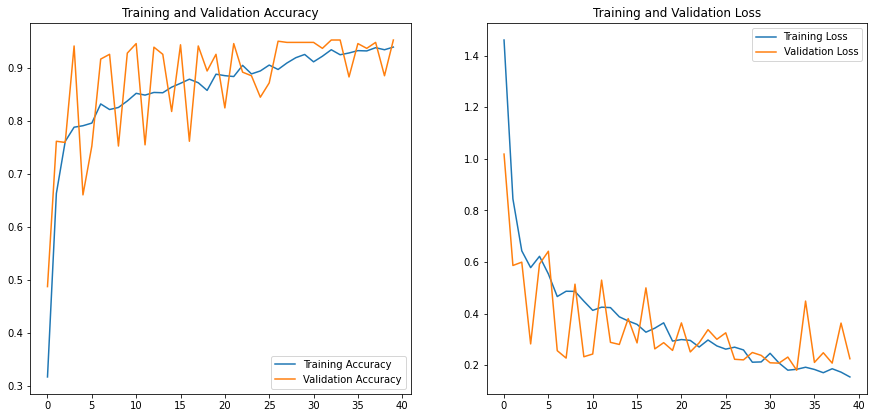

In [16]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()